In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



#  BLOBS dataset: k-Means Clustering



In this exercise, we will find clusters in this dataset, using the k-means clustering algorithm.

## Load and explore the data

Let us load the `blobs` dataset from the specified url, into a Pandas dataframe. Looking at the github site mentioned above, we see that the dataset is stored as a CSV file, and can be accessed at the url:
https://raw.githubusercontent.com/supportvectors/ml-100/master/blobs.csv

Let us, therefore, load it, and perform some basic explorations. 

In [2]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/blobs.csv'
raw_data = pd.read_csv(source)
scaler = StandardScaler()
scaled = scaler.fit_transform(raw_data)
data = pd.DataFrame(data={'x1':scaled[:, 0], 'x2': scaled[:,1]})
data['label'] = raw_data['label']
data.describe(include="all").transpose().style.set_table_styles(sv_table_styles())

**Sample rows**

In [3]:
data.sample(5)

x1        x2  label
1116  1.158023 -0.661416      2
1368 -0.011465 -0.126049      4
422  -0.997425 -0.855949      1
413   1.167298 -0.916176      2
451  -0.824879 -1.128687      1

## Data Visualization

To whet our recollection of the key data exploration findings, let us mention some of the plots of the dataset.

Let us first visualize a scatter plot of the data and look at the histogram of the features. Finally, let us pull of this together with a kernel density plot, into a single plot with subplots.

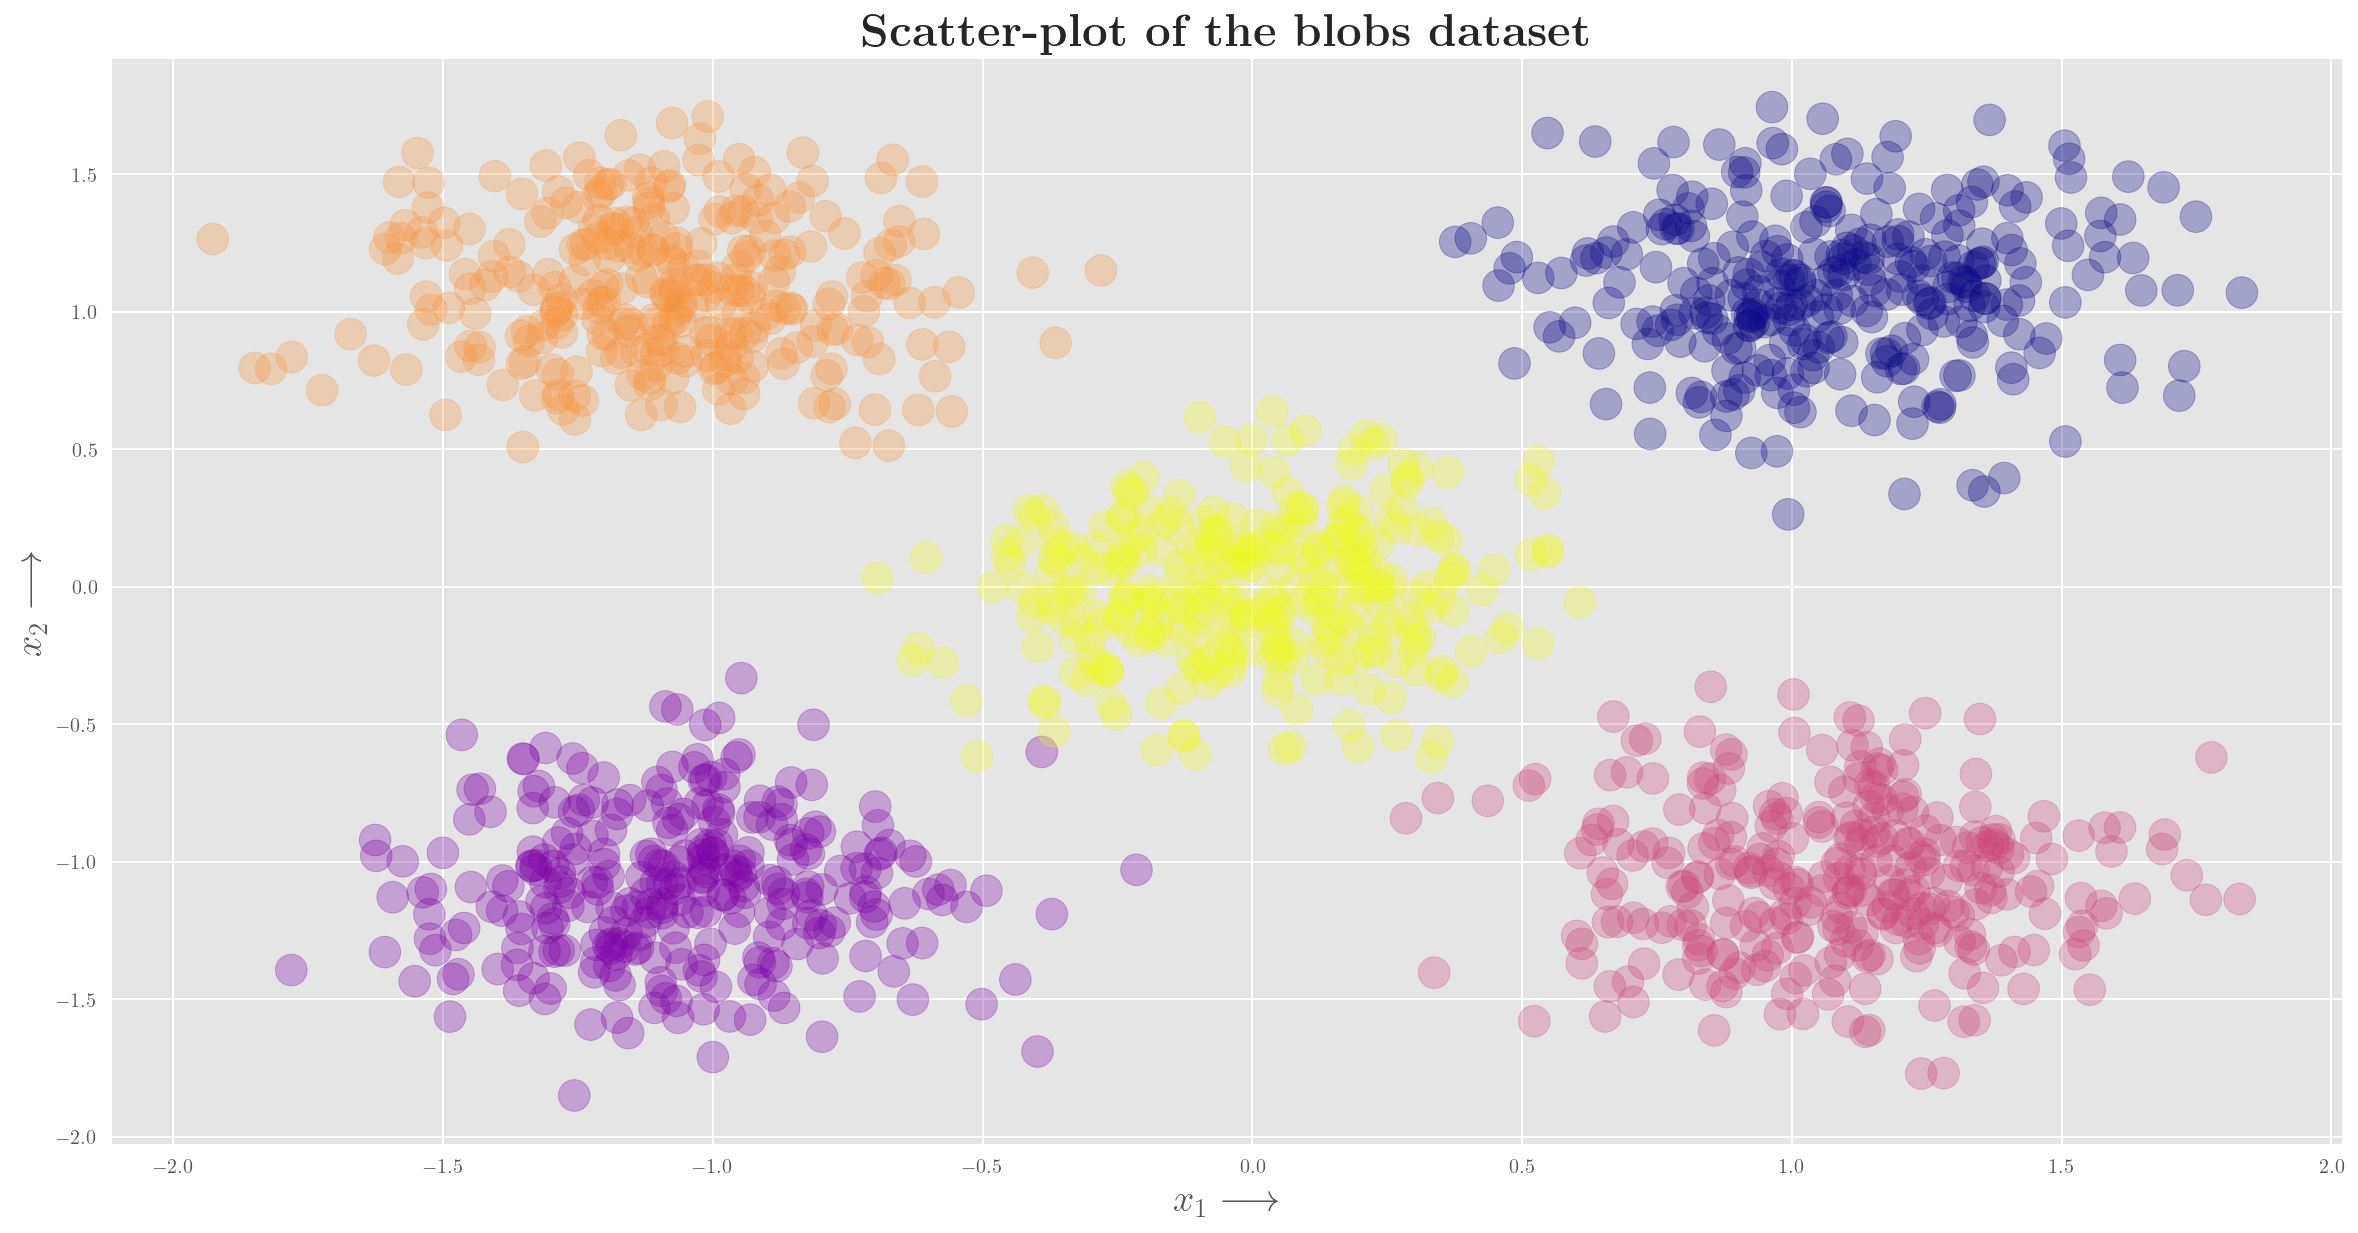

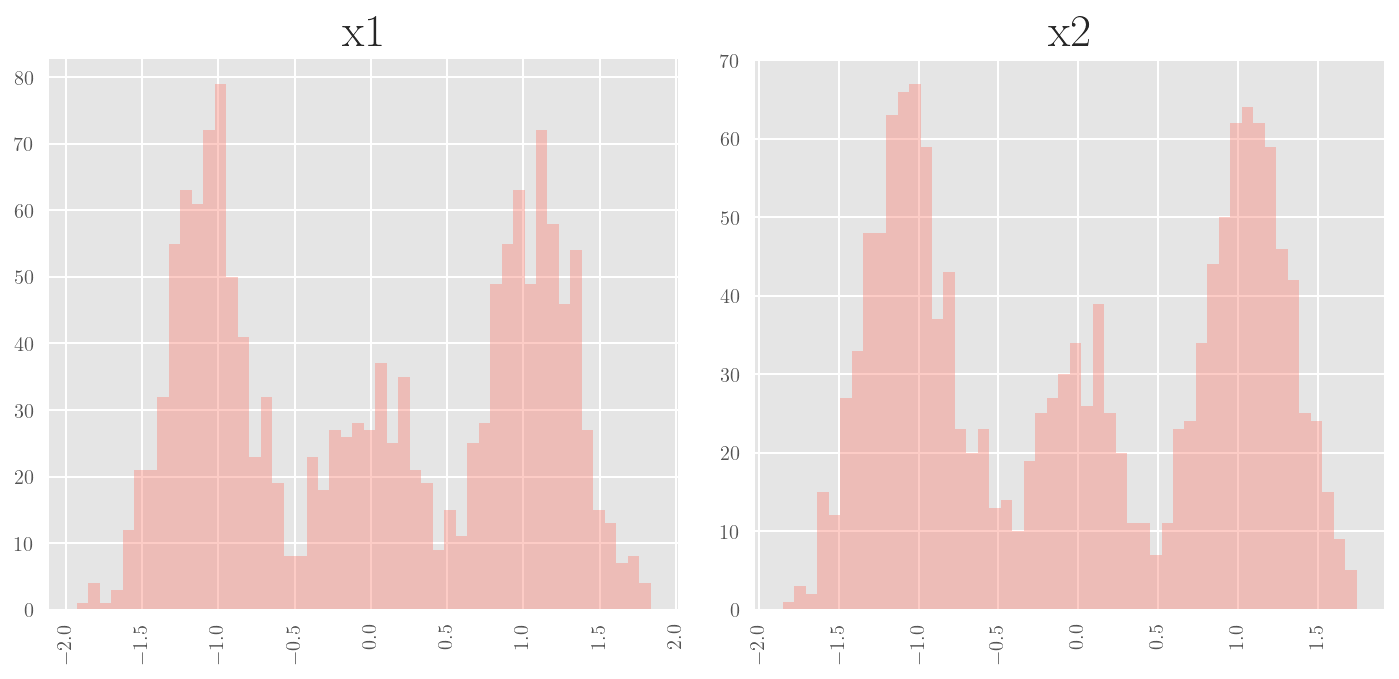

In [4]:
plt.scatter(data['x1'], data['x2'], alpha=0.3, s=250, cmap='plasma', c=data['label'])
plt.title(r'\textbf{Scatter-plot of the blobs dataset}')
plt.xlabel(r'$x_1\longrightarrow$')
plt.ylabel(r'$x_2\longrightarrow$')
plt.show()
data.drop(columns=['label']).hist(bins=50, alpha=0.4, color='salmon', xrot=90, figsize=(10, 5))
plt.tight_layout()

<Figure size 5760x5760 with 0 Axes>

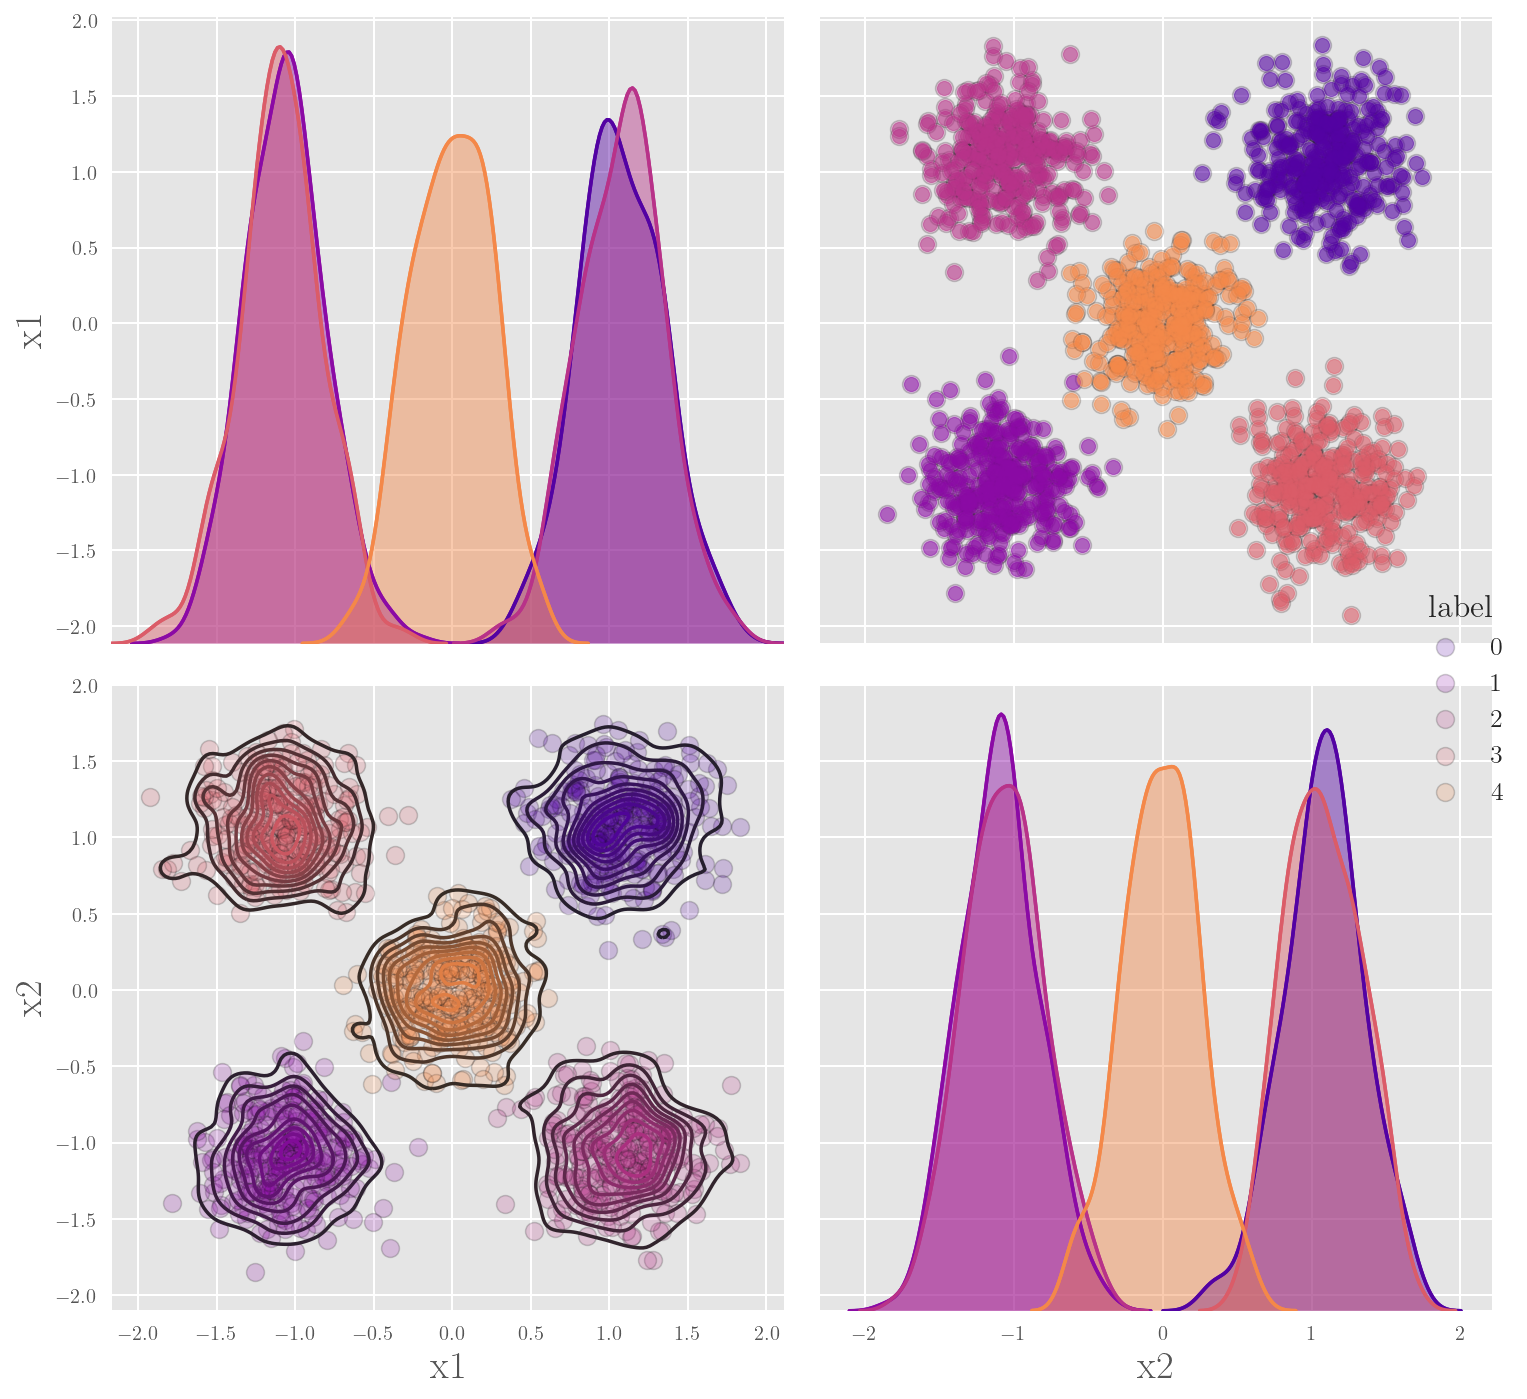

In [5]:
sns.set_palette("plasma")
plt.figure(figsize=(40,40));

sample = data.copy()
sample.label = sample.label.astype('category')
g = sns.pairplot(sample, diag_kind='kde', 
                   plot_kws = { 'alpha': 0.20, 's': 80, 'edgecolor': 'k', }, 
                   size=5, hue='label');
g.map_diag(sns.kdeplot,  shade=True);
g.map_upper(plt.scatter,  alpha=0.5);
g.map_lower(sns.kdeplot, shade=False, shade_lowest=False, cbar=False);

plt.tight_layout();

## k-Means Clustering

Let us now cluster this data for various values of the hyper-parameter: $k$ (the number of clusters to detect).

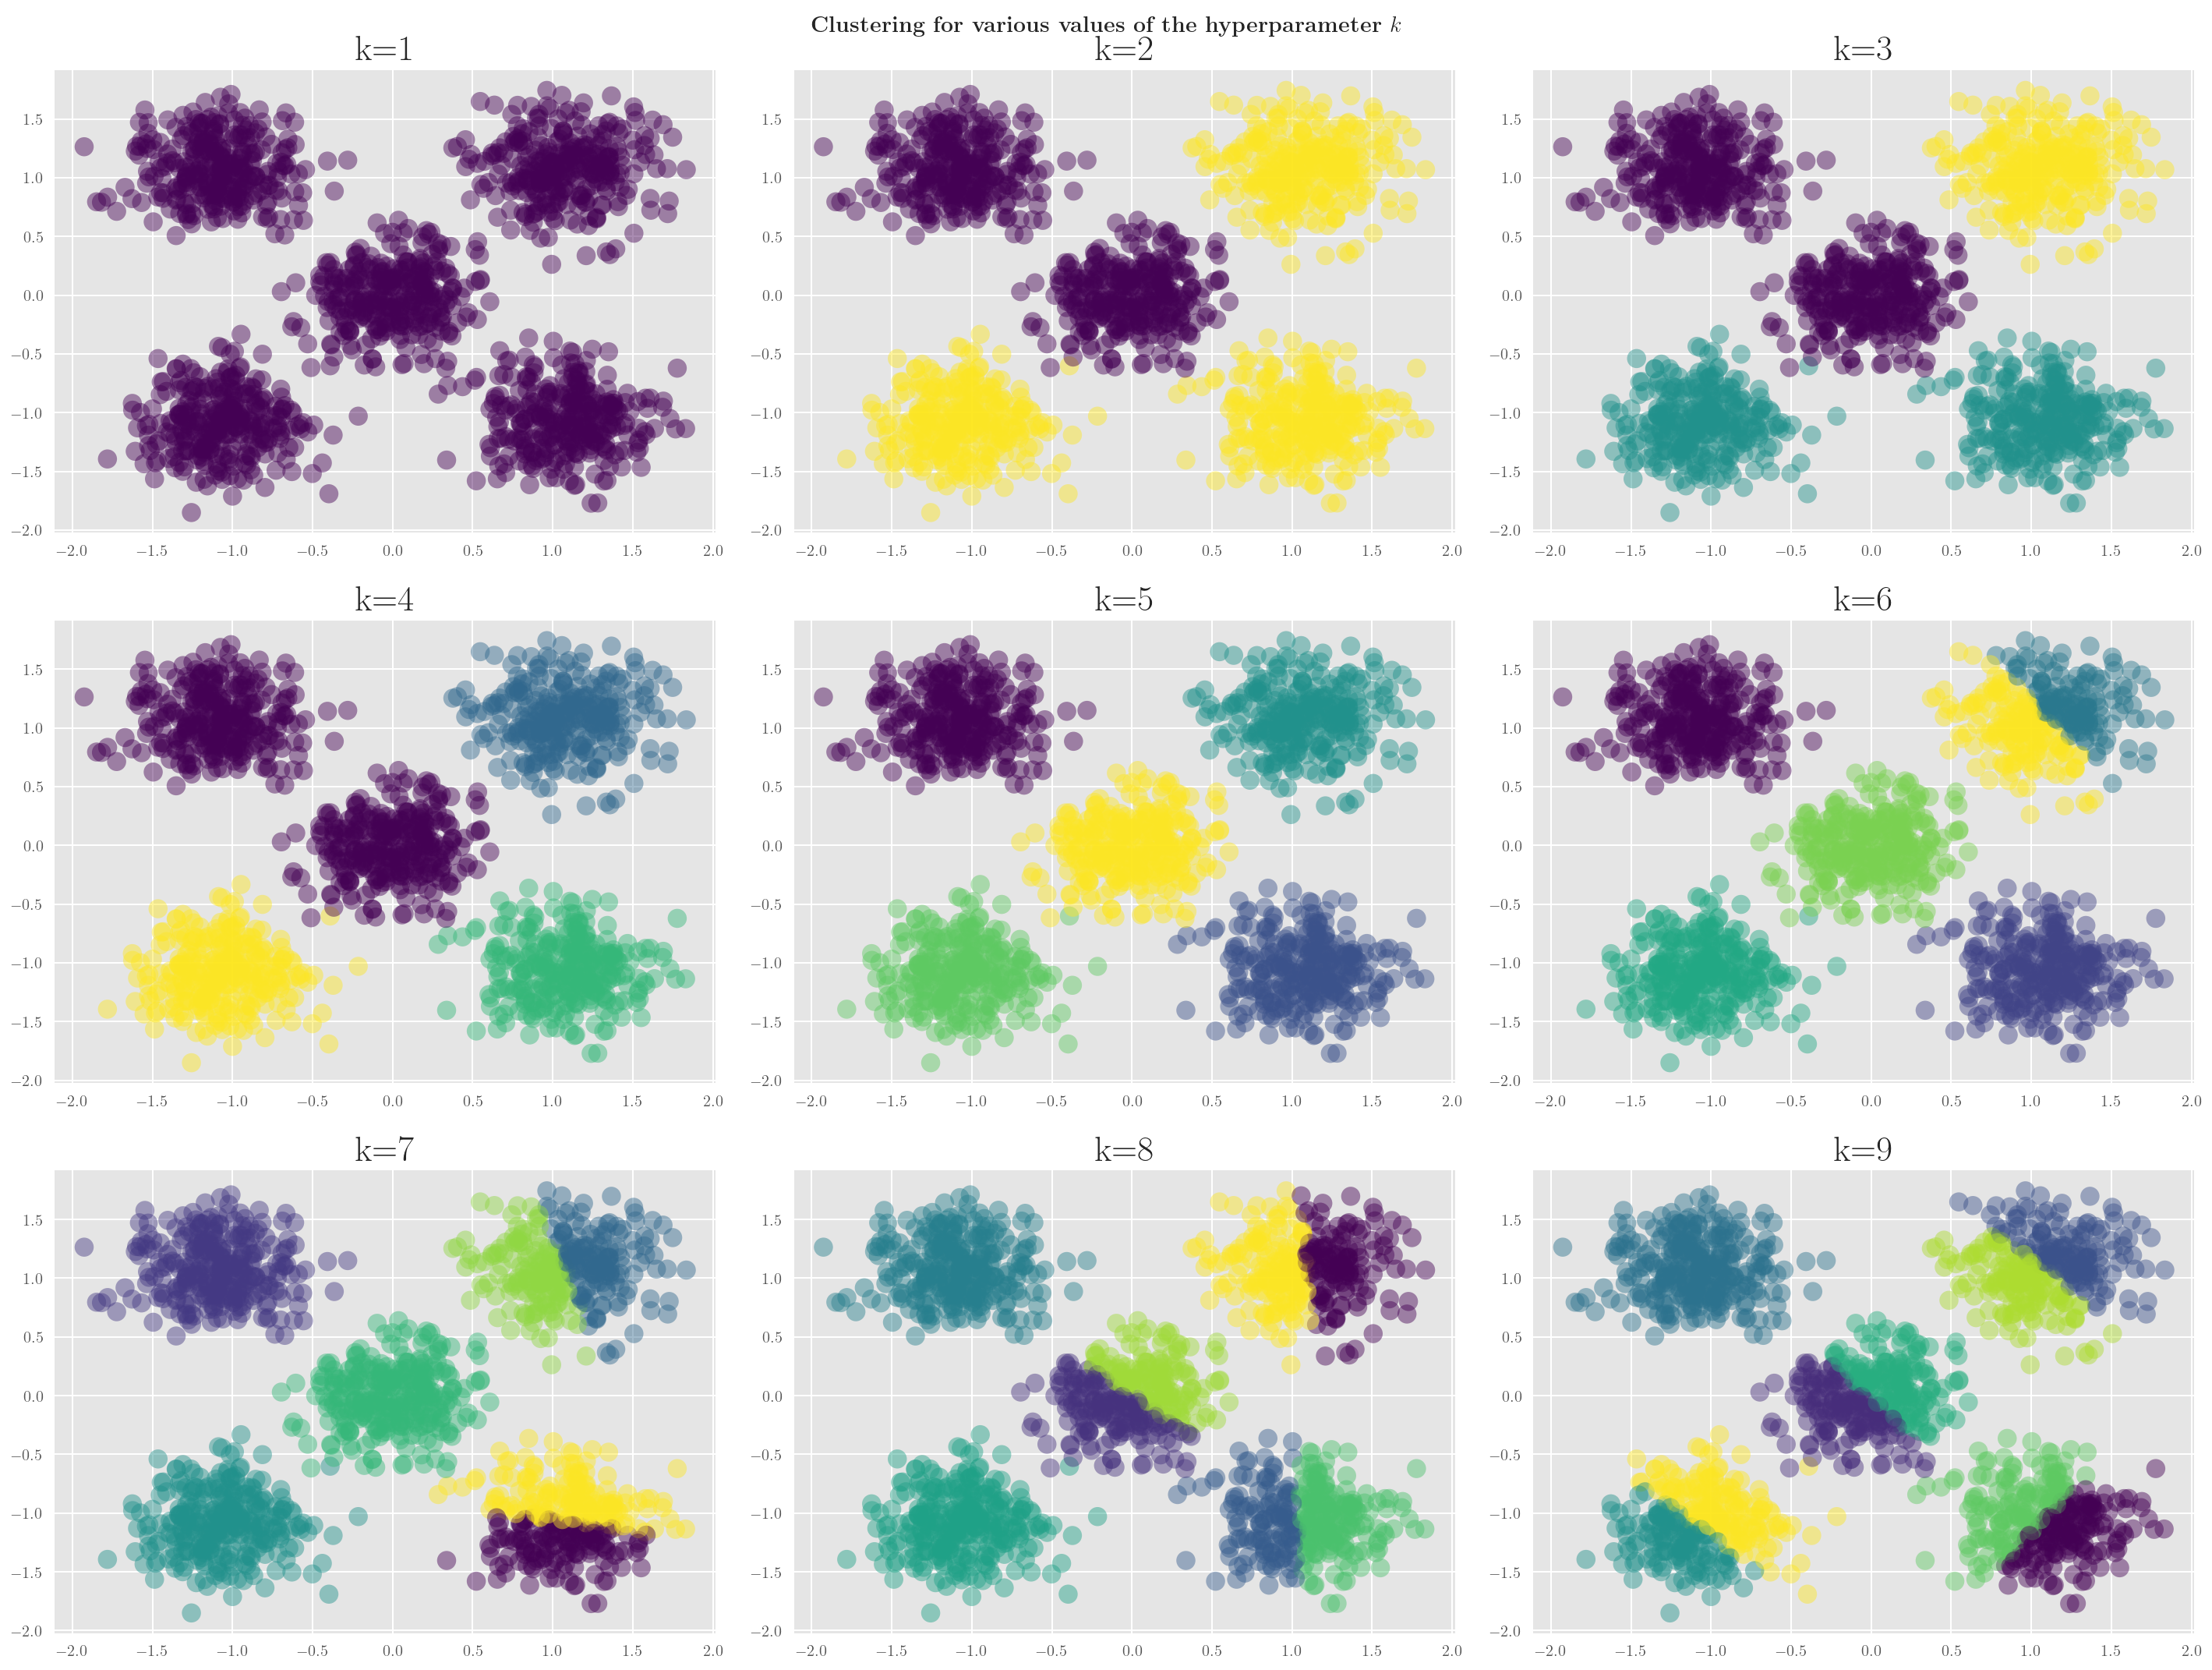

In [6]:
plt.rcParams['figure.figsize'] = (20, 25)
plot_kwds = {'alpha' : 0.45, 's' : 150, 'linewidths':0, }
X = data
wss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    kmeans.predict(X)
    y=kmeans.labels_
    wss.append(kmeans.inertia_)
    
    # Draw a plot
    fig = plt.subplot(5, 3, i)
    fig.scatter(X['x1'], X['x2'], c=y, **plot_kwds, cmap='viridis')
    title = "k={0}".format(i)
    fig.set_title(title)
plt.suptitle(r'\textbf{\Large Clustering for various values of the hyperparameter $k$}')
plt.tight_layout()
plt.show()    

### Scree plot

Visually, clustering with $k=5$ seems appropriate.  Let us confirm this from the clustering metric WSS (inertia) for the various values of the hyperparameter $k$.

Unfortunately, the answer is a little less clear from the scree-plot, though the most likely location of the elbow seems to be at $k=5$, since it has the most pronounced bend or angle.

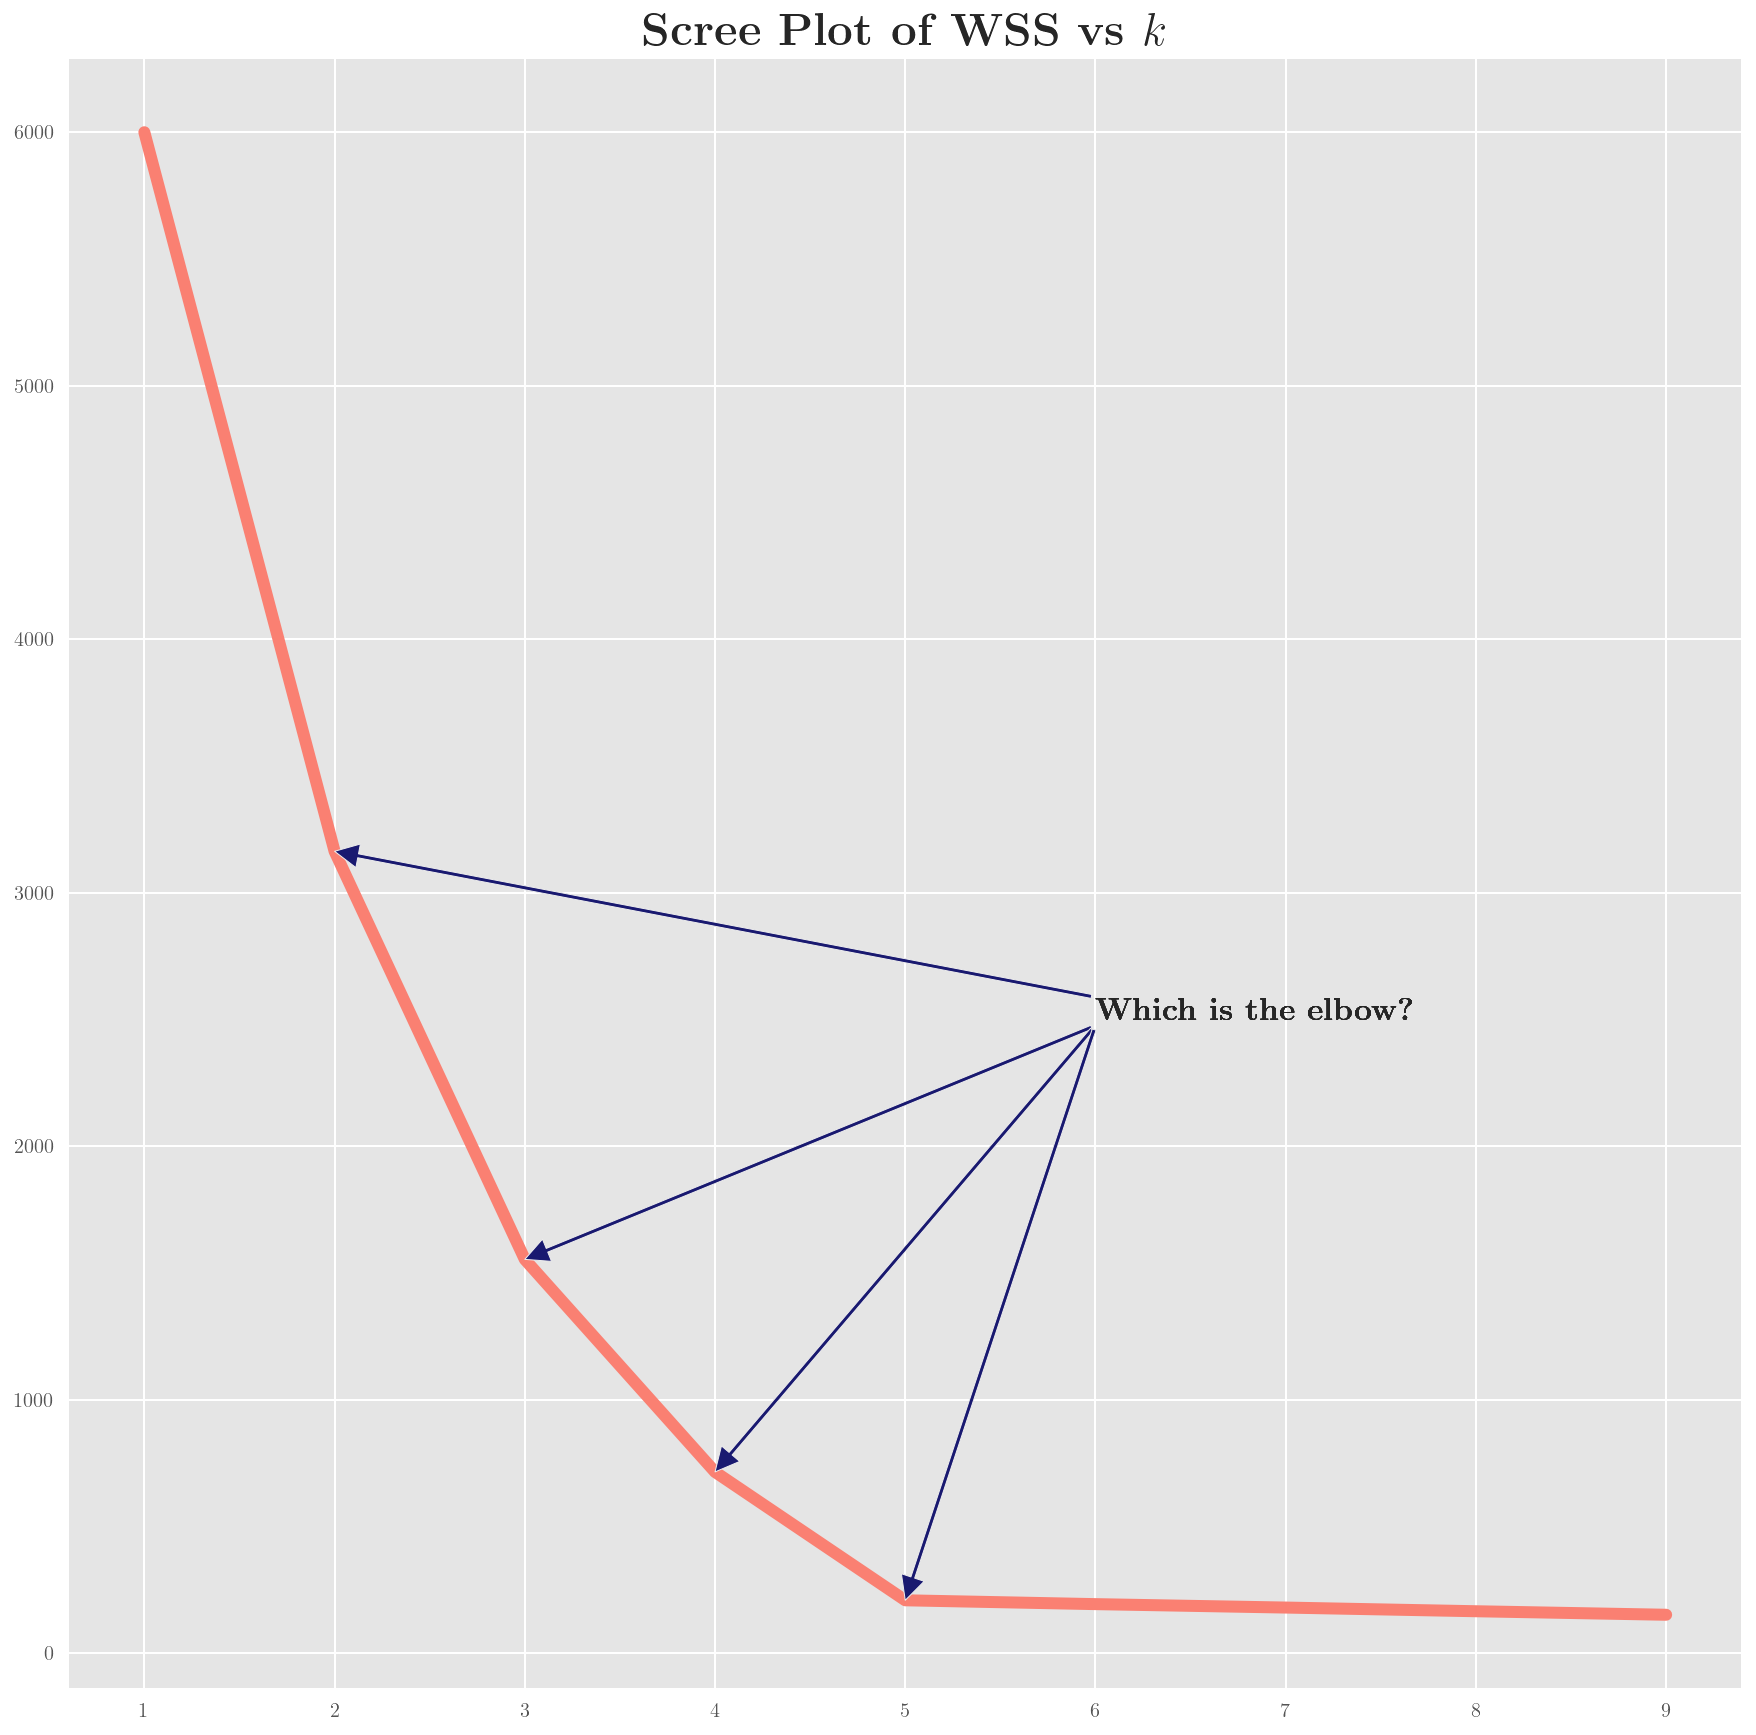

In [7]:
# Now, draw the scree-plot.
fig = plt.figure(figsize=(15, 15))
plt.plot(range(1, 10), wss, alpha=1.0, c='salmon', lw=6)
plt.grid(True)
plt.title(r'\textbf{Scree Plot of WSS vs $k$}')

# annotation to explain
for i in range(2,6):
    plt.annotate(text=r'\textbf{Which is the elbow?}',
                xy = (i,wss[i-1]),
                xytext=(6, 2500),
                arrowprops = dict(facecolor='midnightblue', width=2,)
                );